In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score

In [2]:
cols=['Age','Gender','Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase','Alamine Aminotransferase','Aspartate Aminotransferase','Total Protiens','Albumin','Albumin and Globulin Ratio','Target']
data=pd.read_csv('ILPD.csv',names=cols)

## Checking if there are any missing value and replace them with mean/median depending on the distribution of feature variable

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## There are 4 missing values in Albumin and Globulin Ratio feature

In [25]:
data.loc[(data['Gender'] == 'Female') & (data.Target == 1),'Albumin and Globulin Ratio'].mean()

0.9175824175824175

In [37]:
data.loc[(data['Gender'] == 'Female') & (data.Target == 1),'Albumin and Globulin Ratio'].median()

0.9

In [23]:
data.loc[(data['Gender'] == 'Female') & (data.Target == 2),'Albumin and Globulin Ratio'].mean()

0.9132198142414861

In [27]:
data.loc[(data['Gender'] == 'Female') & (data.Target == 2),'Albumin and Globulin Ratio'].median()

1.0

In [28]:
data.loc[(data['Gender'] == 'Male') & (data.Target == 1),'Albumin and Globulin Ratio'].mean()

0.9132198142414861

In [29]:
data.loc[(data['Gender'] == 'Male') & (data.Target == 1),'Albumin and Globulin Ratio'].median()

0.9

In [30]:
data.loc[(data['Gender'] == 'Male') & (data.Target == 2),'Albumin and Globulin Ratio'].mean()

1.0389655172413794

In [31]:
data.loc[(data['Gender'] == 'Male') & (data.Target == 2),'Albumin and Globulin Ratio'].median()

1.0

## Since the mean is not equal to median, the distribution is not normal
But the median is unaffected by the gender and different for patients and non patients, we will be replacing the missing value with median

In [4]:
data.loc[(data['Albumin and Globulin Ratio'].isnull()) & (data['Target'] == 1),'Albumin and Globulin Ratio']=data.loc[data.Target == 1,'Albumin and Globulin Ratio'].median()

In [5]:
data.loc[(data['Albumin and Globulin Ratio'].isnull()) & (data['Target'] == 2),'Albumin and Globulin Ratio']=data.loc[data.Target == 2,'Albumin and Globulin Ratio'].median()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## We are converting the string datatype of Gender feature into numeric

In [7]:
df1=pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True,dtype=int)
df=pd.concat([data,df1],axis=1).drop('Gender',axis=1)
df

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


## We will check the heatmap if there is correlation between input variables

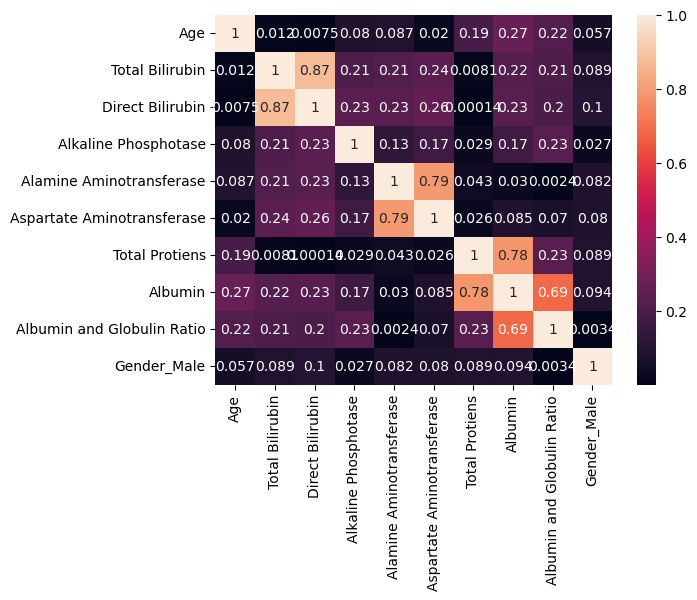

In [8]:
X=df.drop('Target',axis=1)
y=df['Target']
sns.heatmap(X.corr().abs(),annot=True)
plt.show()

## Since all the features has correlation less than 0.9 and very rare to extract medical data, we are either not going to remove any columns or oversample the input

## Splitting the data

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

## Training the dataset using different models

In [11]:
model=LogisticRegression(n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.9142857142857143, 0.6274509803921569, 0.7441860465116279)

In [105]:
model1=SVC()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
recall_score(y_test,y_pred1),precision_score(y_test,y_pred1),f1_score(y_test,y_pred1)

(1.0, 0.7288135593220338, 0.8431372549019608)

In [106]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
recall_score(y_test,y_pred2),precision_score(y_test,y_pred2),f1_score(y_test,y_pred2)

(0.8372093023255814, 0.8, 0.8181818181818183)

In [107]:
model3=RandomForestClassifier(n_jobs=-1)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
recall_score(y_test,y_pred3),precision_score(y_test,y_pred3),f1_score(y_test,y_pred3)

(0.7674418604651163, 0.717391304347826, 0.7415730337078652)

In [108]:
model4=BaggingClassifier(n_jobs=-1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
recall_score(y_test,y_pred4),precision_score(y_test,y_pred4),f1_score(y_test,y_pred4)

(0.813953488372093, 0.7291666666666666, 0.7692307692307692)

In [109]:
model5=GradientBoostingClassifier()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
recall_score(y_test,y_pred5),precision_score(y_test,y_pred5),f1_score(y_test,y_pred5)

(0.813953488372093, 0.7446808510638298, 0.7777777777777778)

In [110]:
model6=XGBClassifier(n_jobs=-1)
model6.fit(X_train,y_train.replace(2,0))
y_pred6=model6.predict(X_test)
recall_score(y_test.replace(2,0),y_pred6),precision_score(y_test.replace(2,0),y_pred6),f1_score(y_test.replace(2,0),y_pred6)

(0.8372093023255814, 0.7659574468085106, 0.8)

# Since we want our model to predict both the results more precisely, can conclude that Support Vector Machine Algorithm is best fit for implementing